# Homework 2 - Classification

In this exercise you will use scikit-learn, a popular machine learning package in python to train and tune a classifier. A particularly useful feature is that all classifiers (and linear models) are called using the same API, so it is easy to test between different models (see the sklearn-intro notebook for examples). So in this exercise we will three classification technique (logistic regression, decision trees and random forest) that are representative of methods and challenges you will encounter when using any classification method.


## Dataset
The dataset you will be using is "Income". 

There are two data files: "income.csv" and "income_Xtest.csv"<br/>
Both files have the following fields, except income which is not available in "income_Xtest.csv"

Features:

1. age: continuous.<br>
2. workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.
3. fnlwgt: continuous.<br>
4. education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.<br>
5. education-num: continuous.<br>
6. marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.<br>
7. occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.<br>
8. relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.<br>
9. race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.<br>
10. sex: Female, Male.<br>
11. capital-gain: continuous.<br>
12. capital-loss: continuous.<br>
13. hours-per-week: continuous.<br>
14. native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.<br>

Target: 

income: whether a person makes over 50K a year.


Training dataset, "income.csv", contains 3706 rows and 15 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "income_Xtest.csv", contains 1000 rows and 14 columns. This is the test set which only contains the features.<br/>

Prediction task is to determine whether a person makes over 50K a year. (If you transfrom the target as binary values, please make sure >50 is 1, <=50 is 0)

In [113]:
import numpy as np
import pandas as pd

In [114]:
from sklearn.preprocessing import OneHotEncoder

# Load your training data set and test data
# using OneHOtEncoder to turn the outcome into a binary. This is admitedly probably not the most efficient way to perform this. The rest of the steps are dropping and merging onto the original dataset.
income_learn = pd.read_csv("income.csv")
income_learn_binary = OneHotEncoder().fit_transform(income_learn.iloc[:,-1].values.reshape(-1,1))
new_df = pd.DataFrame(income_learn_binary.toarray()[:,1])
income_learn = income_learn.drop(income_learn.columns[-1], axis=1)
income_learn = income_learn.join(new_df)
income_learn = income_learn.rename({0: "income"}, axis = 'columns')

# Clean the dataset: remove the rows with " ?"
for i in income_learn:
    income_learn = income_learn.loc[income_learn[i] != " ?"]  

income_learn = income_learn.reset_index(drop=True) # reindexing so that merging can be done in future steps without error

In [115]:
# Split data into X and y
x = income_learn.drop(income_learn.columns[-1], axis=1)
y = pd.DataFrame(income_learn.iloc[:,-1])

### Standardization and One-hot Encoding

Standardize the continuous features and convert categorical variables into dummy variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feeb4abc1c0>,
      dtype=object)

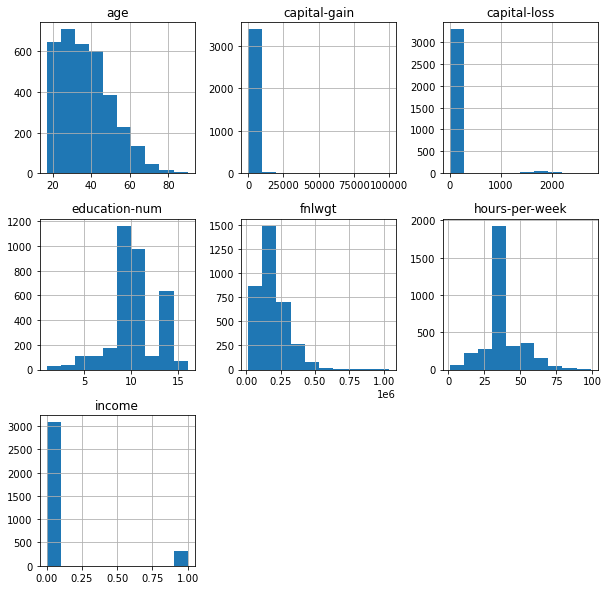

In [116]:
%matplotlib inline
income_learn.hist(figsize = (10,10))
# income and education-num are categorical

In [117]:
from sklearn.preprocessing import StandardScaler

ecoder = OneHotEncoder()
# steps to standardize continuous vars
standard = StandardScaler().fit_transform(x[['age', 'capital-gain', 'capital-loss', 'fnlwgt', 'hours-per-week']])
df_standard = pd.DataFrame(standard)
df_standard = df_standard.rename({0: 'age', 1: 'capital-gain', 2: 'capital-loss', 3: 'fnlwgt', 4: 'hours-per-week'}, axis = 'columns')

# steps to turn categories into dummy vars
x_cat = ecoder.fit_transform(x[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']])
cat_column_names = ecoder.get_feature_names(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

df_hotcat = pd.DataFrame(x_cat.toarray(), columns = cat_column_names)

# merging categorical and continuous 
transformed_income = df_standard.join(df_hotcat)
transformed_income

,age,capital-gain,capital-loss,fnlwgt,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,workclass_ Self-emp-not-inc,...,native-country_ Portugal,native-country_ Puerto-Rico,native-country_ Scotland,native-country_ South,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia
0,-0.471588,-0.123479,-0.191138,-0.269636,-0.008782,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.359645,-0.123479,-0.191138,-0.722019,-0.008782,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,-0.093755,-0.123479,-0.191138,-1.525864,-0.008782,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.115312,-0.123479,5.235000,-1.537238,0.578602,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.359645,-0.123479,-0.191138,-0.785702,-0.008782,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3406,0.510778,-0.123479,-0.191138,-0.983111,-0.008782,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3407,0.510778,-0.123479,-0.191138,-0.776942,1.333811,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3408,0.813045,2.404718,-0.191138,-0.663054,-0.008782,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3409,0.888612,1.069299,-0.191138,-1.405849,0.326866,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


#### Splitting training data into training and validation set (the code has been provided)

In [118]:
X_train = transformed_income.iloc[:2800,:]
y_train = y.iloc[:2800,:]
X_val = transformed_income.iloc[2800:,:]
y_val = y.iloc[2800:,:]

Print the shape of your X_train, X_val, X_test

In [119]:
print(X_train.shape)
print(X_val.shape)
print(transformed_income.shape)

(2800, 101)
(611, 101)
(3411, 101)


## Logistic Regression

As previously mentioned, the scikit-learn classification API makes it easy to train a classifier. 


Use LogisticRegression from sklearn.linear_model to make a logistic regression classifier.

In [120]:
from sklearn.linear_model import LogisticRegression
# First, initialize the classifier with default parameters
lmodel = LogisticRegression()
# then fit the classifier on training data and labels
lmodel.fit(X_train, y_train)

LogisticRegression()

In [121]:
# predict the output for validation dataset
y_pred = pd.DataFrame(lmodel.predict(X_val))

Implement precision(), recall(), accuracy() by yourselves

In [122]:
def precision(y, y_preds):
    """
    Return precision, which is TP/(TP+FP)
    """
    count_TP = 0
    for i, k in zip(y.values, y_preds.values):
        if k == 1 and i == k:
            count_TP += 1

    count_FP = 0
    for i, k in zip(y.values, y_preds.values):
        if k == 1 and i != k:
            count_FP += 1

    return(count_TP/(count_TP+count_FP))

def recall(y, y_preds):
    """
    Return recall, which is TP/(TP+FN)
    """
    count_TP = 0
    for i, k in zip(y.values, y_preds.values):
        if k == 1 and i == k:
            count_TP += 1

    count_FN = 0
    for i, k in zip(y.values, y_preds.values):
        if k == 0 and i != k:
            count_FN += 1
    
    return(count_TP/(count_TP+count_FN))


def accuracy(y, y_preds):
    """
    Return accuracy, which is (TP+TN)/(TP+FP+FN+TN)
    """
    count_TP = 0
    for i, k in zip(y.values, y_preds.values):
        if k == 1 and i == k:
            count_TP += 1
    
    count_TN = 0
    for i, k in zip(y.values, y_preds.values):
        if k == 0 and i == k:
            count_TN += 1

    count_FP = 0
    for i, k in zip(y.values, y_preds.values):
        if k == 1 and i != k:
            count_FP += 1

    count_FN = 0
    for i, k in zip(y.values, y_preds.values):
        if k == 0 and i != k:
            count_FN += 1

    return((count_TP+count_TN)/(count_TP+count_TN+count_FP+count_FN))

Use your above functions to print precision, recall, and accuracy of your model:

In [103]:
# Using the predictions to calculate accuracy, precision, recall
print(precision(y_val, y_pred))
print(recall(y_val, y_pred))
print(accuracy(y_val, y_pred))

0.8297872340425532
0.21910112359550563
0.7594108019639935


Q1. Accuracy<br>
Ans - 75.94%

Q2. Precision<br>
Ans - 82.97%

Q3. Recall<br>
Ans - 21.91%

Q4. Which metric (accuracy, precision, recall) is more appropriate and in what cases? Will there be scenarios where it is better to use precision than accuracy? Explain. <br>
Ans -  

Precision: Is the most valuabe when predicting all the TRUE values isn't the goal. What is most important here is that when the model predicts TRUE, it is always accurate. This is important when FP could have severe consquences, but FN are not as important (for example, predicting the repayment of a loan).  

Recall: Is the most valuable when predicting all the TRUE values IS the goal. Should be used when having false negatives will have severe consequences (for example, detecting deadly disease).  

Accuracy: Is the most valuable when any error in prediction is important. Should be used over precision when FN are just as important as FP.

Q5. Which metric is suitable in this case? <br>
Ans - Because the prediction task is to determine whether a person makes over 50K a year, accuracy is the most valuable here, becuase all outcomes are equally important.

### ROC curve

Use roc_Curve from sklearn.metrics and use matplotlib.pyplot to plot the ROC curve. Use validation set to make predictions.

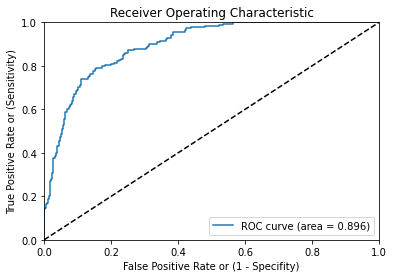

In [123]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
probs = lmodel.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val,probs)
roc_auc = roc_auc_score(y_val,probs)

# method I: plt
import matplotlib.pyplot as plt

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")


Q6. What is the AUC obtained?<br>
Ans - 89.6% prediction accuracy

### Hyperparameters

"Model tuning" refers to model adjustments to better fit the data. This is separate from "fitting" or "training" the model. The fitting/training procedure is governed by the amount and quality of your training data, as the fitting algorithm is unique to each classifier (e.g. logistic regression or random forest). 

However, there are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

Build a logistic regression model with hyperparameter 'C' set to 0.1 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall. 


In [124]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score

In [125]:
C1 = 0.1
penalty = 'l1'
model_lasso = LogisticRegression(penalty=penalty, C=C1, solver='liblinear')

model_lasso.fit(X_train, y_train)
y_lasso_pred = pd.DataFrame(model_lasso.predict(X_val))

print(f'Accurancy: {accuracy_score(y_val,y_lasso_pred)}')
print(f'Precision: {precision_score(y_val, y_lasso_pred)}')
print(f'Recall: {recall_score(y_val, y_lasso_pred)}')

Accurancy: 0.7430441898527005
Precision: 1.0
Recall: 0.11797752808988764


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l1'. Make predictions on validation set and compute accuracy, precision and recall. 


In [126]:
C2 = 0.5
penalty = 'l1'
model_lasso2 = LogisticRegression(penalty=penalty, C=C2, solver='liblinear')

model_lasso2.fit(X_train, y_train)
y_lasso_pred2 = pd.DataFrame(model_lasso2.predict(X_val))

print(f'Accurancy: {accuracy_score(y_val,y_lasso_pred2)}')
print(f'Precision: {precision_score(y_val, y_lasso_pred2)}')
print(f'Recall: {recall_score(y_val, y_lasso_pred2)}')

Accurancy: 0.7577741407528642
Precision: 0.8571428571428571
Recall: 0.20224719101123595


Build a model with hyperparameter 'C' set to 0.1 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall. 


In [127]:
C1 = 0.1
penalty = 'l2'
model_ridge = LogisticRegression(penalty=penalty, C=C1, solver='liblinear')

model_ridge.fit(X_train, y_train)
y_ridge_pred = pd.DataFrame(model_ridge.predict(X_val))

print(f'Accurancy: {accuracy_score(y_val,y_ridge_pred)}')
print(f'Precision: {precision_score(y_val, y_ridge_pred)}')
print(f'Recall: {recall_score(y_val, y_ridge_pred)}')

Accurancy: 0.7463175122749591
Precision: 0.9259259259259259
Recall: 0.1404494382022472


Build a model with hyperparameter 'C' set to 0.5 and penalty set to 'l2'. Make predictions on validation set and compute accuracy, precision and recall. 

In [128]:
C2 = 0.5
penalty = 'l2'
model_ridge2 = LogisticRegression(penalty=penalty, C=C2, solver='liblinear')

model_ridge2.fit(X_train, y_train)
y_ridge_pred2 = pd.DataFrame(model_ridge2.predict(X_val))

print(f'Accurancy: {accuracy_score(y_val,y_ridge_pred2)}')
print(f'Precision: {precision_score(y_val, y_ridge_pred2)}')
print(f'Recall: {recall_score(y_val, y_ridge_pred2)}')

Accurancy: 0.7594108019639935
Precision: 0.8604651162790697
Recall: 0.20786516853932585


Q7. Which of the above models is better? <br>
Ans- Using accuracy as the determiner of model fitness, the last regression (utilizing ridge with a penalty of 0.5), appears to be the best.

### Test set

You have worked on training and validation dataset so far, but testing data does not include the labels. Choose the best hyperparameter values from the four models as seen in the previous section. Use this logistic model to make predictions on test set. 


In [131]:
# Construct your final logistic regression using the best hyperparameters obtained above(C and penalty) ###
income_test = pd.read_csv("income_Xtest.csv")

for i in income_test:
    income_test = income_test.loc[income_test[i] != " ?"]  
income_test = income_test.reset_index(drop=True)

standard = StandardScaler().fit_transform(income_test[['age', 'capital-gain', 'capital-loss', 'fnlwgt', 'hours-per-week']])
df_standard = pd.DataFrame(standard)
df_standard = df_standard.rename({0: 'age', 1: 'capital-gain', 2: 'capital-loss', 3: 'fnlwgt', 4: 'hours-per-week'}, axis = 'columns')

x_test_cat = ecoder.fit(x[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']])
income_test_cat = ecoder.transform(income_test[['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']])
cat_column_names = ecoder.get_feature_names(['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country'])

income_test_hotcat = pd.DataFrame(income_test_cat.toarray(), columns = cat_column_names)

transformed_income_test = df_standard.join(income_test_hotcat)
transformed_income_test

# return the prediction as "y_pred"
y_pred = model_ridge2.predict(transformed_income_test)

In [135]:
sum(y_pred) # just a varification that it is prediciting something on the test set.

39.0

## Dataset 2
The dataset you will be using in the following parts is "Wine". 

There are two data files: "wine.csv" and "wine_Xtest.csv"<br/>
Both files have the following fields, except quality which is not available in "wine_Xtest.csv"

Features: <br>
1 - fixed acidity<br>
2 - volatile acidity<br>
3 - citric acid<br>
4 - residual sugar<br>
5 - chlorides<br>
6 - free sulfur dioxide<br>
7 - total sulfur dioxide<br>
8 - density<br>
9 - pH<br>
10 - sulphates<br>
11 - alcohol<br>

Target:<br>
12 - quality ('good' and 'bad')<br>

Training dataset, "wine.csv", contains 1000 rows and 12 columns. This is the training set containing both of the features and the target.<br/>
Test dataset, "wine_Xtest.csv", contains 300 rows and 11 columns. This is the test set which only contains the features.<br/>

Prediction task is to determine whether the quality is good. (If you transfrom the target as binary values, please make sure "good" is 1, "bad" is 0)

In [19]:
# Load your training data set and test data
# Same process as the first data set to transform to binary outcome
wine_learn = pd.read_csv("wine.csv")
wine_learn_binary = OneHotEncoder().fit_transform(wine_learn.iloc[:,-1].values.reshape(-1,1))
wine_new_df = pd.DataFrame(wine_learn_binary.toarray()[:,1])
wine_learn = wine_learn.drop(wine_learn.columns[-1], axis=1)
wine_learn = wine_learn.join(wine_new_df)
wine_learn = wine_learn.rename({0: "quality"}, axis = 'columns')

In [20]:
# Split data into X and y
wine_x = wine_learn.drop(wine_learn.columns[-1], axis=1)
wine_y = pd.DataFrame(wine_learn.iloc[:,-1])

### Skewness of data:
In probability theory and statistics, skewness is a measure of the asymmetry of the probability distribution of a real-valued random variable about its mean. <br>

If tail is on the right of data, it is right skewed data. It is also called positively skewed data.<br>
Common transformations of this data include square root, cube root, and log.

If the tail is to the left of data, then it is called left skewed data. It is also called negatively skewed data.<br>
Common transformations include square, cube and exponentiation.

Plot a histogram of X to understand the distributions of the continuous values.<br/>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feeaf5d9df0>,
      dtype=object)

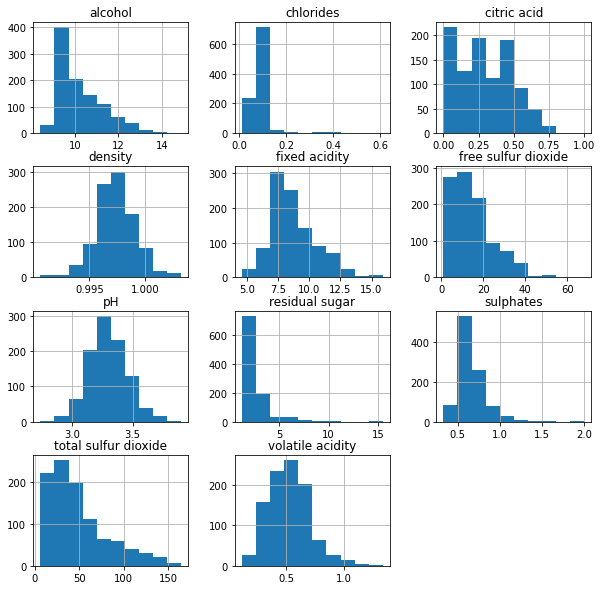

In [21]:
wine_x.hist(figsize = (10,10))

Q8. According to the above histogram, can you see any skewed features? Which features are skewed? Are they left-skewed or right-skewed? <br>
Ans - There are skewed features. Alcohol, Fixed Acidity, Chlorides, Free Sulfur Dioxide, Residual Sugar, Sulphates, Total Sulfur Dioxide, and Volatile Acidity are all right skewed.

Perform transformations on the skewed features so that the distribution of these features becomes closer to a normal distribution.

In [22]:
import numpy as np
skewed = ['alcohol', 'fixed acidity', 'chlorides', 'free sulfur dioxide', 'residual sugar', 'sulphates', 'total sulfur dioxide', 'volatile acidity']

# use the cuberoot becuase the sqrt did not seem sufficient to regularize some skews
for i in skewed:
    wine_x[i] = np.cbrt(wine_x[i])

Plot the histogram of the transformed X to see if your transformations are successful

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7feeb00fa2e0>,
      dtype=object)

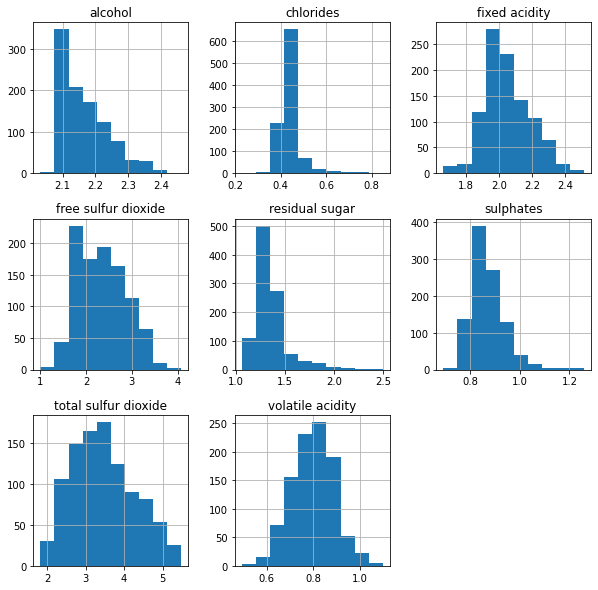

In [23]:
wine_x[skewed].hist(figsize = (10,10))

Standardize the transformed X

In [24]:
wine_cat = ['alcohol', 'fixed acidity', 'chlorides', 'citric acid', 'density', 'pH', 'free sulfur dioxide', 'residual sugar', 'sulphates', 'total sulfur dioxide', 'volatile acidity']
wine_standard = StandardScaler().fit_transform(wine_x[wine_cat])
wine_df_standard = pd.DataFrame(wine_standard)
wine_df_standard = wine_df_standard.rename({0: 'alcohol', 1: 'fixed acidity', 2: 'chlorides', 3: 'citric acid', 4: 'density', 5: 'pH', 6: 'free sulfur dioxide', 7: 'residual sugar', 8: 'sulphates', 9: 'total sulfur dioxide', 10: 'volatile acidity'}, axis = 'columns')

wine_x = wine_x.drop(wine_x.loc[:,wine_cat], axis=1)
wine_x = wine_df_standard.join(wine_x)

Splitting training data into training and validation set (the code has been provided)

In [25]:
X_train = wine_x.iloc[:700,:]
y_train = pd.DataFrame(wine_y).iloc[:700,:]
X_val = wine_x.iloc[700:,:]
y_val = pd.DataFrame(wine_y).iloc[700:,:]

## Decision Tree
From sklearn.tree use DecisionTreeClassifier to build a classification model with default parameters.

In [26]:
from sklearn.tree import DecisionTreeClassifier
### Fit the classifier on the training data
# Please set random_state=20

wine_decision_model = DecisionTreeClassifier(random_state=20)
wine_decision_model.fit(X_train,y_train)


DecisionTreeClassifier(random_state=20)

In [27]:
### Make predictions on the training data
y_pred_train = wine_decision_model.predict(X_train)

Print accuracy, prediction and recall for the predictions made on the training data. 

In [28]:
print(f'Accurancy: {accuracy_score(y_train,y_pred_train)}')
print(f'Precision: {precision_score(y_train, y_pred_train)}')
print(f'Recall: {recall_score(y_train, y_pred_train)}')

Accurancy: 1.0
Precision: 1.0
Recall: 1.0


In [29]:
### Make predictions on the validation data
y_pred_val = wine_decision_model.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the validation data. 

In [30]:
print(f'Accurancy: {accuracy_score(y_val,y_pred_val)}')
print(f'Precision: {precision_score(y_val, y_pred_val)}')
print(f'Recall: {recall_score(y_val, y_pred_val)}')

Accurancy: 0.63
Precision: 0.627906976744186
Recall: 0.6967741935483871


Plot ROC curve and obtain AUC for validation predictions

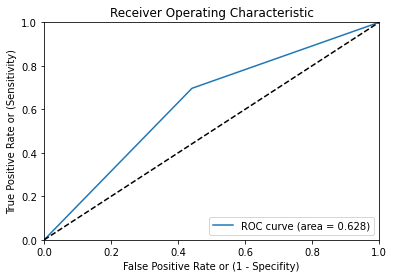

In [31]:
# Plot the ROC curve by giving appropriate names for title and axes. 
wine_probs = wine_decision_model.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val,wine_probs)
roc_auc = roc_auc_score(y_val,wine_probs)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Q9. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance.<br>

Ans - The model has low bias, but high variance. We can see how it prefectly predicts itself, but does not perfectly predict the validation set.

## Random Forest


Decision Trees have low predictive power compared to other methods due to high variance. Random Forest increases prediction power at the expense of decreased interpretability. 


From sklearn.ensemble use RandomForestClassifier to build a classification model with default parameters.

In [32]:
from sklearn.ensemble import RandomForestClassifier
### Fit the classifier on the training data
# Please set random_state=20
wine_forest_model = RandomForestClassifier(random_state=20)
wine_forest_model.fit(X_train,y_train)


RandomForestClassifier(random_state=20)

In [33]:
### Make predictions on the training data
y_pred_train = wine_forest_model.predict(X_train)

Print accuracy, prediction and recall for the predictions made on the training data. 

In [34]:
print(f'Accurancy: {accuracy_score(y_train,y_pred_train)}')
print(f'Precision: {precision_score(y_train, y_pred_train)}')
print(f'Recall: {recall_score(y_train, y_pred_train)}')

Accurancy: 1.0
Precision: 1.0
Recall: 1.0


In [35]:
### Make predictions on the validation data
y_pred_val = wine_forest_model.predict(X_val)

Print accuracy, prediction and recall for the predictions made on the validation data. 

In [36]:
print(f'Accurancy: {accuracy_score(y_val,y_pred_val)}')
print(f'Precision: {precision_score(y_val, y_pred_val)}')
print(f'Recall: {recall_score(y_val, y_pred_val)}')

Accurancy: 0.7166666666666667
Precision: 0.7011494252873564
Recall: 0.7870967741935484


Plot ROC curve and obtain AUC for the validation predictions

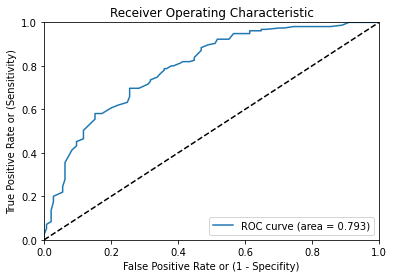

In [37]:
# Plot the ROC curve by giving appropriate names for title and axes. 
wine_probs = wine_forest_model.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val,wine_probs)
roc_auc = roc_auc_score(y_val,wine_probs)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

Q10. Based on the scores for training set and test set, explain the performance of the above model in terms of bias and variance. Is the Random Forest model better or worse than the Decision Tree model? Explain why you think the performance may have improved or deteriorated. <br>

Ans - Similarly to the decision tree, the model has low bias, but high variance. We can see how it prefectly predicts itself, but does not perfectly predict the validation set.

But, it better predicts the validation set than the deicision tree. The performance improved becuase the random forest did not weigh the importance of a few features the same as the decision tree did (and it appears that the decision tree was wrong to weigh those features so heavily). This is due to the randomization in random forest feature selection.

## Hyperparameters

"Model tuning" refers to model adjustments to better fit the data. This is separate from "fitting" or "training" the model. The fitting/training procedure is governed by the amount and quality of your training data, as the fitting algorithm is unique to each classifier (e.g. logistic regression or random forest). 

However, there are aspects of some models that are user specified. For example, when using a random forest (which is basically an ensemble of decision trees), it is probably a good idea to choose the right number of underlying trees. Too many and the model might overfit, and too few and the model might not be able to properly learn the data. Parameters such as these are referred to as "hyperparameters" or "free parameters", as the values for these are determined by the user and not the algorithm.

A quick and efficient way to optimize hyperparameters is to perform Grid Search over different values of the parameters. 

In [38]:
from sklearn.model_selection import GridSearchCV

In [63]:
# In the below dictionary, fill in the list of values that you want to try out for each parameter
# Refer to the descriptions in sklearn's doc to understand what the parameters depict

param_grid = {
    'max_depth': [i for i in range(1,100,25)],
    'max_features': [None, 'sqrt', 'log2'],
    'min_samples_leaf': [i for i in range(1,100,25)],
    'min_samples_split': [i for i in range(1,100,25)],
    'n_estimators': [i for i in range(1,500,125)]
}

In [64]:
rf = RandomForestClassifier(random_state=20)

In [65]:
# We use f1_score in this question
grid_search = GridSearchCV(estimator = rf, scoring='f1', param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2) 

In [66]:
# Fit the training data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 768 candidates, totalling 2304 fits
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 210 tasks      | elapsed:   13.3s
[Parallel(n_jobs=-1)]: Done 413 tasks      | elapsed:   29.0s
[Parallel(n_jobs=-1)]: Done 696 tasks      | elapsed:   47.2s
[Parallel(n_jobs=-1)]: Done 1061 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 1506 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 2033 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 2304 out of 2304 | elapsed:  2.5min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=20), n_jobs=-1,
             param_grid={'max_depth': [1, 26, 51, 76],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 26, 51, 76],
                         'min_samples_split': [1, 26, 51, 76],
                         'n_estimators': [1, 126, 251, 376]},
             scoring='f1', verbose=2)

In [70]:
# Print the best parameters
sorted(grid_search.cv_results_.keys())

['mean_fit_time',
 'mean_score_time',
 'mean_test_score',
 'param_max_depth',
 'param_max_features',
 'param_min_samples_leaf',
 'param_min_samples_split',
 'param_n_estimators',
 'params',
 'rank_test_score',
 'split0_test_score',
 'split1_test_score',
 'split2_test_score',
 'std_fit_time',
 'std_score_time',
 'std_test_score']

In [71]:
# Print the best score
grid_search.score(X_train, y_train)

0.6913946587537093

In [77]:
# Using the best model, do the following:
# Make predictions on the training set and display accuracy, precision and recall.
y_pred_train = grid_search.predict(X_train)

print(f'Accurancy: {accuracy_score(y_train, y_pred_train)}')
print(f'Precision: {precision_score(y_train, y_pred_train)}')
print(f'Recall: {recall_score(y_train, y_pred_train)}')
print()
# Make predictions on the validation set and display accuracy, precision and recall. 
y_pred_val = grid_search.predict(X_val)

print(f'Accurancy: {accuracy_score(y_val,y_pred_val)}')
print(f'Precision: {precision_score(y_val, y_pred_val)}')
print(f'Recall: {recall_score(y_val, y_pred_val)}')

Accurancy: 0.7028571428571428
Precision: 0.6976047904191617
Recall: 0.6852941176470588

Accurancy: 0.6933333333333334
Precision: 0.7299270072992701
Recall: 0.6451612903225806


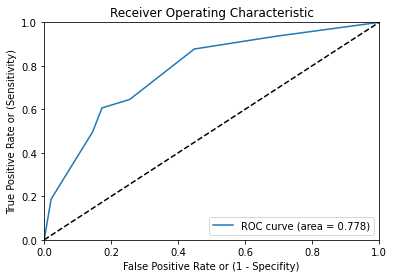

In [78]:
# Using the best model, plot the ROC curve by giving appropriate names for title and axes. 
grid_probs = grid_search.predict_proba(X_val)[:,1]
fpr, tpr, thresholds = roc_curve(y_val,grid_probs)
roc_auc = roc_auc_score(y_val,grid_probs)

plt.plot(fpr, tpr, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate or (1 - Specifity)')
plt.ylabel('True Positive Rate or (Sensitivity)')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")

### Test
Choose the best hyperparameter values from the previous section. Use this random forest model to make predictions on test set. 

In [137]:
# Construct your final random forest using the best hyperparameters obtained above
wine_test = pd.read_csv("wine_Xtest.csv")

wine_test_cat = ['alcohol', 'fixed acidity', 'chlorides', 'citric acid', 'density', 'pH', 'free sulfur dioxide', 'residual sugar', 'sulphates', 'total sulfur dioxide', 'volatile acidity']
wine_test_standard = StandardScaler().fit_transform(wine_test[wine_cat])
wine_df_test_standard = pd.DataFrame(wine_test_standard)
wine_df_test_standard = wine_df_test_standard.rename({0: 'alcohol', 1: 'fixed acidity', 2: 'chlorides', 3: 'citric acid', 4: 'density', 5: 'pH', 6: 'free sulfur dioxide', 7: 'residual sugar', 8: 'sulphates', 9: 'total sulfur dioxide', 10: 'volatile acidity'}, axis = 'columns')

wine_test = wine_test.drop(wine_test.loc[:,wine_test_cat], axis=1)
wine_test = wine_df_standard.join(wine_test)
# return the prediction as "y_pred2"
# y_pred2 = 

y_pred2 = grid_search.predict(wine_test)

In [48]:
#end